## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


X values:
 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


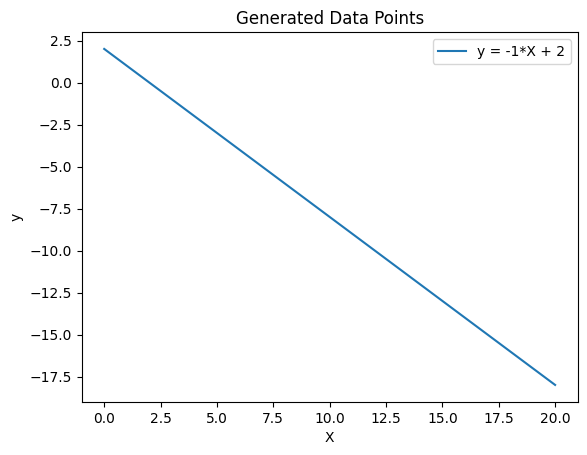

In [4]:

X = np.linspace(0, 20, num=50)

y = -1 * X + 2

print("X values:\n", X)


plt.plot(X, y, label='y = -1*X + 2')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data Points')
plt.legend()
plt.show()


In [5]:
print("X values:\n", X)

X values:
 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [6]:
print("y values:\n", y)

y values:
 [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.83673469
 -10.24489796 -10.65306122 -11.06122449 -11.46938776 -11.87755102
 -12.28571429 -12.69387755 -13.10204082 -13.51020408 -13.91836735
 -14.32653061 -14.73469388 -15.14285714 -15.55102041 -15.95918367
 -16.36734694 -16.7755102  -17.18367347 -17.59183673 -18.        ]


### Plot X vs. y

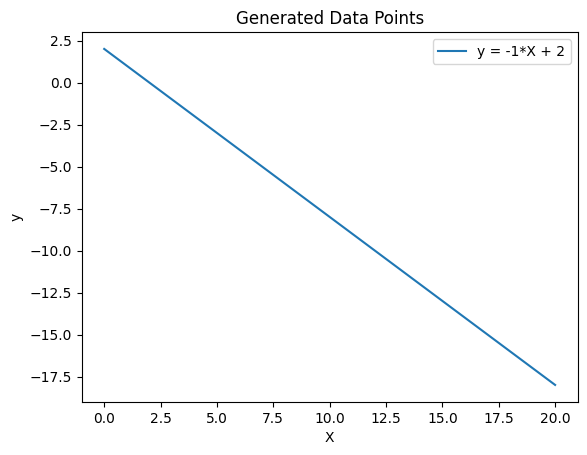

In [7]:
plt.plot(X, y, label='y = -1*X + 2')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data Points')
plt.legend()
plt.show()

In [24]:
def plot_loss(loss):
    plt.plot(loss, linestyle='-', marker='*')
    plt.title("Loss Over Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()



In [25]:

def plot_thetas_loss(thetas, loss):
    theta_0 = [t[0] for t in thetas]
    theta_1 = [t[1] for t in thetas]
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    axes[0].plot(theta_0, loss, marker="o")
    axes[0].set_title("Theta 0 vs Loss")
    axes[0].set_xlabel("Theta 0")
    axes[0].set_ylabel("Loss")
    
    axes[1].plot(theta_1, loss, marker="o")
    axes[1].set_title("Theta 1 vs Loss")
    axes[1].set_xlabel("Theta 1")
    axes[1].set_ylabel("Loss")
    
    plt.tight_layout()
    plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [ ]:
def batch_gradient_descent(X, y, theta0, theta1, learning_rate, n_iterations, stop_criteria=1e-6):
    m = len(y)
    loss_history = []
    thetas0_history = []
    thetas1_history = []
    for iteration in range(n_iterations):
        predictions = X.dot(np.array([theta0, theta1]))
        errors = predictions - y
        gradients = 2/m * X.T.dot(errors)
        theta0 = theta0 - learning_rate * gradients[0]
        theta1 = theta1 - learning_rate * gradients[1]
        loss = np.mean(errors**2)
        loss_history.append(loss)
        thetas0_history.append(theta0)
        thetas1_history.append(theta1)
        if iteration > 0 and abs(loss_history[-2] - loss_history[-1]) < stop_criteria:
            break
    
    return theta0, theta1, loss_history, thetas0_history, thetas1_history


In [26]:
def batch_gradient_descent(X, y, theta, learning_rate, n_iterations, stop_criteria=1e-6):
    m = len(y)
    loss_history = []
    thetas_history = []
    
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        loss = np.mean((X.dot(theta) - y)**2)
        loss_history.append(loss)
        thetas_history.append(theta.copy())
        if iteration > 0 and abs(loss_history[-2] - loss_history[-1]) < stop_criteria:
            break
    
    return theta, loss_history, thetas_history

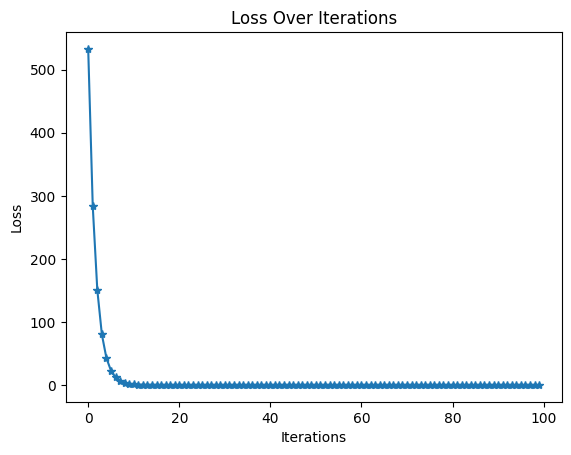

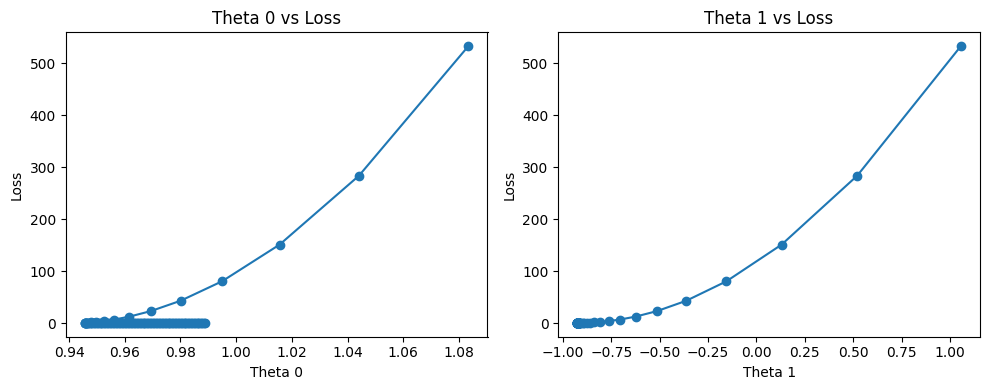

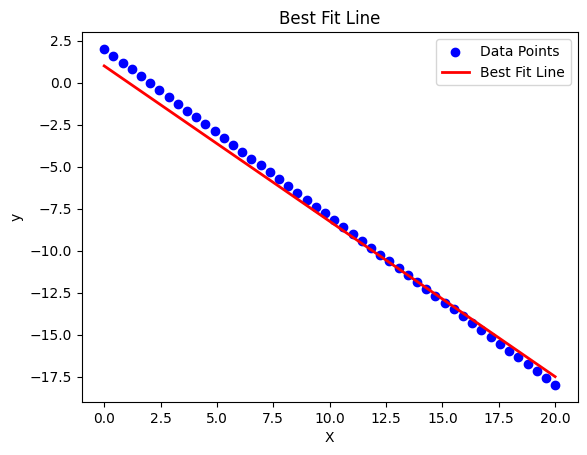

Final theta values: [[ 0.98890002]
 [-0.92479045]]
R² score: 0.9924099455280314


In [ ]:
from sklearn.metrics import r2_score
theta = np.random.randn(2, 1)
learning_rate = 0.001
n_iterations = 100
X_b = np.c_[np.ones((len(X), 1)), X]
theta, loss_history, thetas_history = batch_gradient_descent(X_b, y.reshape(-1, 1), theta, learning_rate, n_iterations)
y_pred = X_b.dot(theta)
r2 = r2_score(y.reshape(-1, 1), y_pred)

plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)

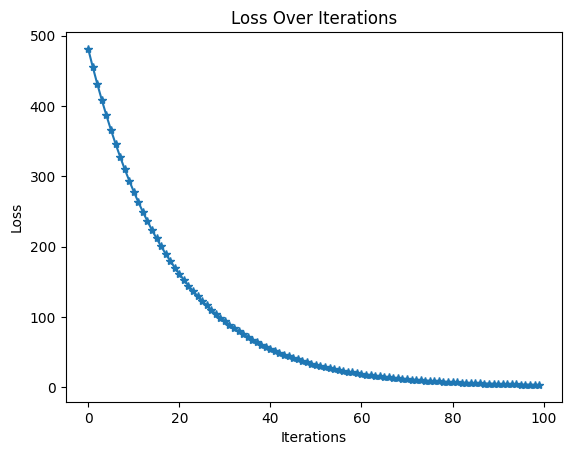

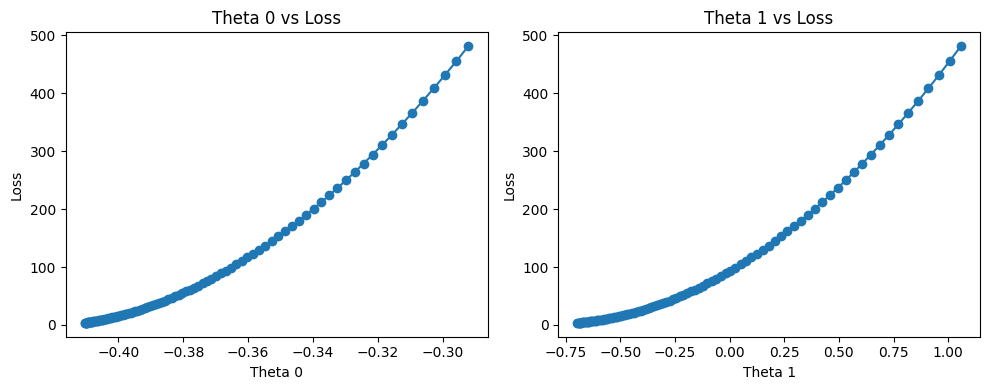

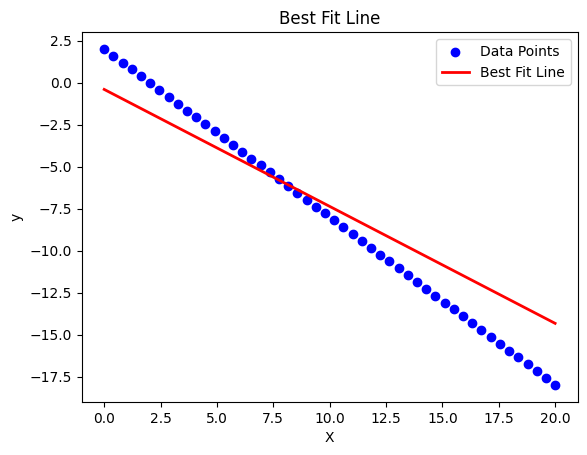

Final theta values: [[-0.41031204]
 [-0.69621985]]
R² score: 0.8963685567235964


In [33]:
theta = np.random.randn(2, 1)
learning_rate = 0.0001
n_iterations = 100
X_b = np.c_[np.ones((len(X), 1)), X]
theta, loss_history, thetas_history = batch_gradient_descent(X_b, y.reshape(-1, 1), theta, learning_rate, n_iterations)
y_pred = X_b.dot(theta)
r2 = r2_score(y.reshape(-1, 1), y_pred)

plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)

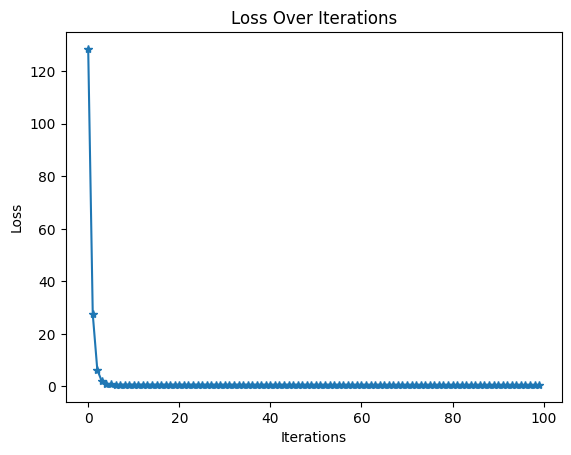

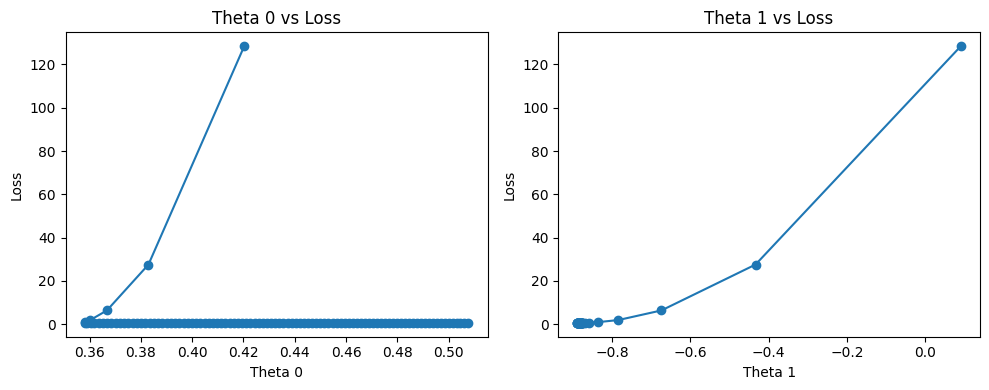

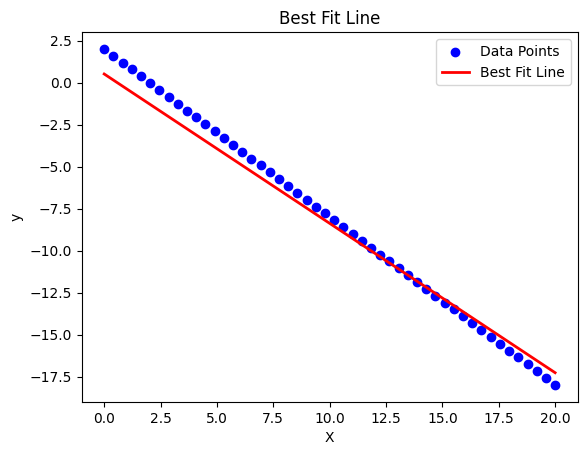

Final theta values: [[ 0.50767633]
 [-0.88899516]]
R² score: 0.983465816785213


In [34]:
theta = np.random.randn(2, 1)
learning_rate = 0.002
n_iterations = 100
X_b = np.c_[np.ones((len(X), 1)), X]
theta, loss_history, thetas_history = batch_gradient_descent(X_b, y.reshape(-1, 1), theta, learning_rate, n_iterations)
y_pred = X_b.dot(theta)
r2 = r2_score(y.reshape(-1, 1), y_pred)

plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)

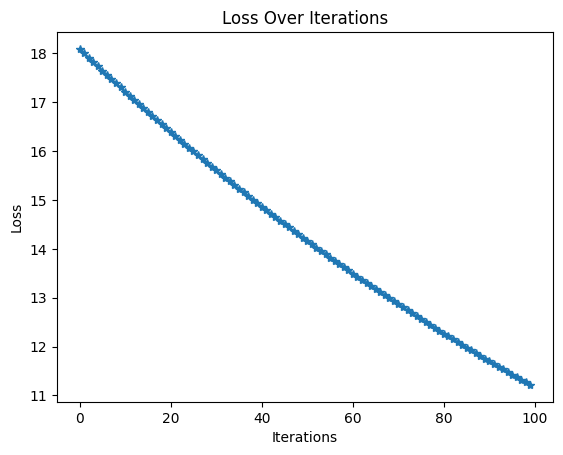

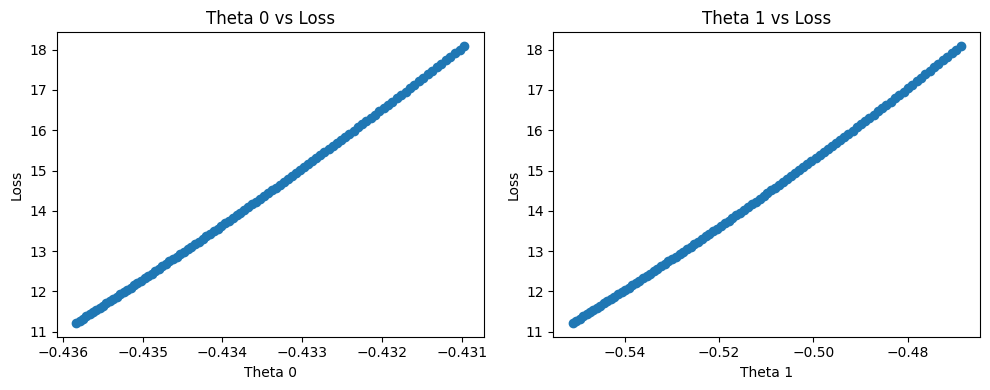

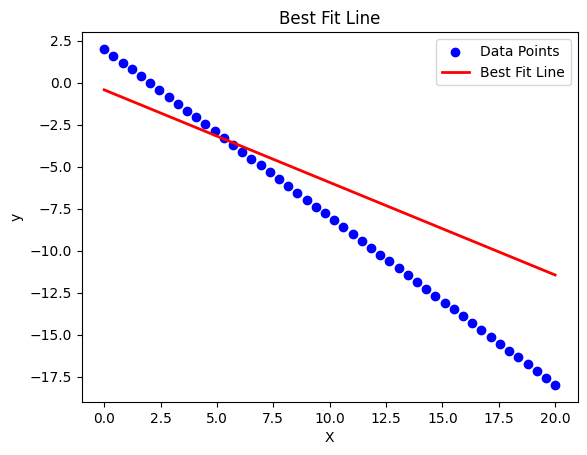

Final theta values: [[-0.43582962]
 [-0.55097043]]
R² score: 0.6767132104454134


In [35]:
theta = np.random.randn(2, 1)
learning_rate = 0.00001
n_iterations = 100
X_b = np.c_[np.ones((len(X), 1)), X]
theta, loss_history, thetas_history = batch_gradient_descent(X_b, y.reshape(-1, 1), theta, learning_rate, n_iterations)
y_pred = X_b.dot(theta)
r2 = r2_score(y.reshape(-1, 1), y_pred)

plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

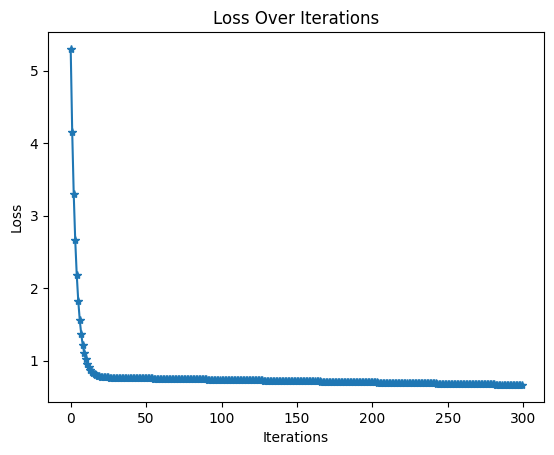

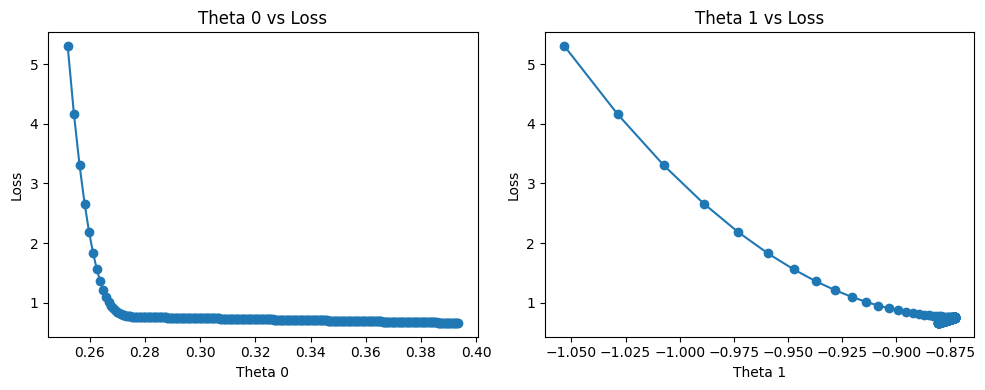

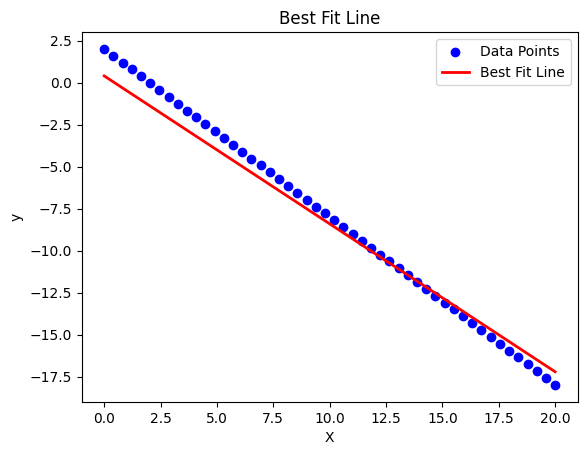

Final theta values: [[ 0.39349031]
 [-0.88050156]]
R² score: 0.9808387697940645


In [36]:
theta = np.random.randn(2, 1)
learning_rate = 0.0005
n_iterations = 300
X_b = np.c_[np.ones((len(X), 1)), X]
theta, loss_history, thetas_history = batch_gradient_descent(X_b, y.reshape(-1, 1), theta, learning_rate, n_iterations)
y_pred = X_b.dot(theta)
r2 = r2_score(y.reshape(-1, 1), y_pred)

plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)

In [7]:
from sklearn.metrics import r2_score

In [37]:
print("Final theta values:", theta)
print("R² score:", r2)

Final theta values: [[ 0.39349031]
 [-0.88050156]]
R² score: 0.9808387697940645


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

In [10]:
def plot_loss(loss):
    plt.plot(loss, linestyle='-', marker='*')
    plt.title("Loss Over Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()
def plot_thetas_loss(thetas, loss):
    theta_0 = [t[0] for t in thetas]
    theta_1 = [t[1] for t in thetas]
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    axes[0].plot(theta_0, loss, marker="o")
    axes[0].set_title("Theta 0 vs Loss")
    axes[0].set_xlabel("Theta 0")
    axes[0].set_ylabel("Loss")
    
    axes[1].plot(theta_1, loss, marker="o")
    axes[1].set_title("Theta 1 vs Loss")
    axes[1].set_xlabel("Theta 1")
    axes[1].set_ylabel("Loss")
    
    plt.tight_layout()
    plt.show()

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [38]:
def momentum_based_gradient_descent(X, y, theta, learning_rate, n_iterations, weight_momentum, stop_criteria=.00001):
    m = len(y)
    loss_history = []
    thetas_history = []
    momentum = np.zeros_like(theta)
    
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        momentum = weight_momentum * momentum + learning_rate * gradients
        momentum = theta - momentum
        loss = np.mean((X.dot(theta) - y)**2)
        loss_history.append(loss)
        thetas_history.append(theta.copy())
        if iteration > 0 and abs(loss_history[-2] - loss_history[-1]) < stop_criteria:
            break
    
    return theta, loss_history, thetas_history

In [46]:



theta = np.random.randn(2, 1)
def momentum_based_gradient_descent(X, y, weights, learning_rate, n_iterations, momentum, stop_criteria=1e-5):
    m = len(y)
    loss_history = []
    weights_history = []
    velocity = np.zeros_like(weights)  # Initialize velocity for momentum

    for iteration in range(n_iterations):
        gradients = (2 / m) * X.T.dot(X.dot(weights) - y)
        velocity = momentum * velocity + learning_rate * gradients
        weights = weights - velocity

        loss = np.mean((X.dot(weights) - y) ** 2)
        loss_history.append(loss)
        weights_history.append(weights.copy())

        if iteration > 0 and abs(loss_history[-2] - loss_history[-1]) < stop_criteria:
            break

    return weights, loss_history, weights_history

final_weights, loss_history, weights_history = momentum_based_gradient_descent(
    X_b, y.reshape(-1, 1), theta, learning_rate=0.001, n_iterations=1000, momentum=0.9
)


print("Final weights:", final_weights)
print("Loss history:", loss_history[-5:]) 


Final weights: [[ 1.94037022]
 [-0.99556451]]
Loss history: [0.0009563090221779128, 0.0009460359991564148, 0.0009358733327242243, 0.0009258198373902581, 0.0009158743403985096]


#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [47]:
alpha = 0.0005  
gamma = 0.5     
max_iterations = 300
final_weights, loss_history, weights_history = momentum_based_gradient_descent(
    X_b, y.reshape(-1, 1), theta, learning_rate=alpha, n_iterations=max_iterations, momentum=gamma
)


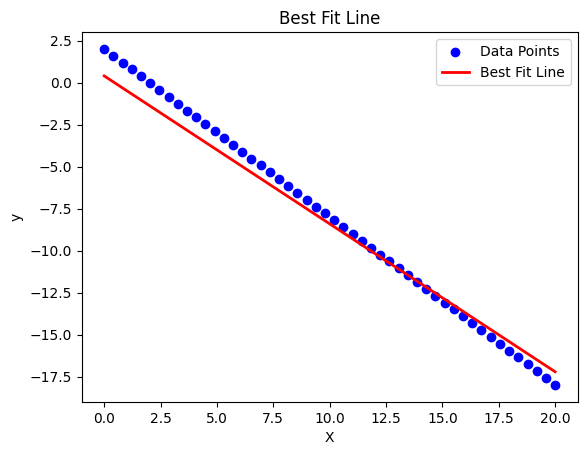

Final theta values: [[0.74222423]
 [1.51061621]]
R² score: 0.9808387697940645


In [49]:
r2 = r2_score(y.reshape(-1, 1), y_pred)



plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)

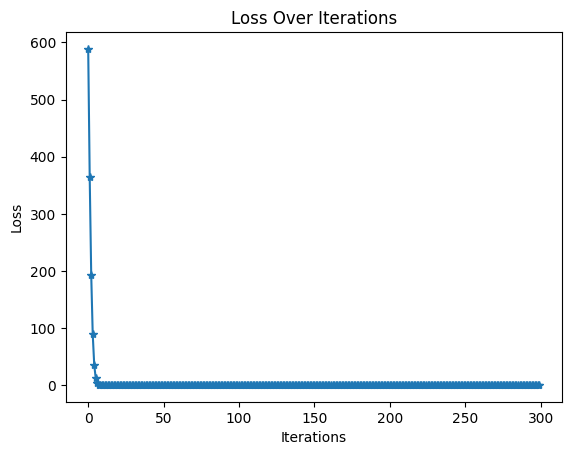

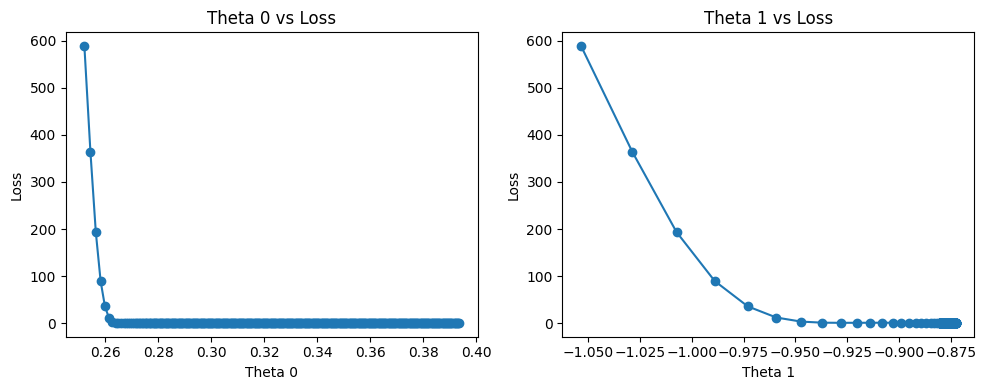

In [50]:
plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [51]:
alpha = 0.0005  
gamma = 0.9     
max_iterations = 300
final_weights, loss_history, weights_history = momentum_based_gradient_descent(
    X_b, y.reshape(-1, 1), theta, learning_rate=alpha, n_iterations=max_iterations, momentum=gamma
)

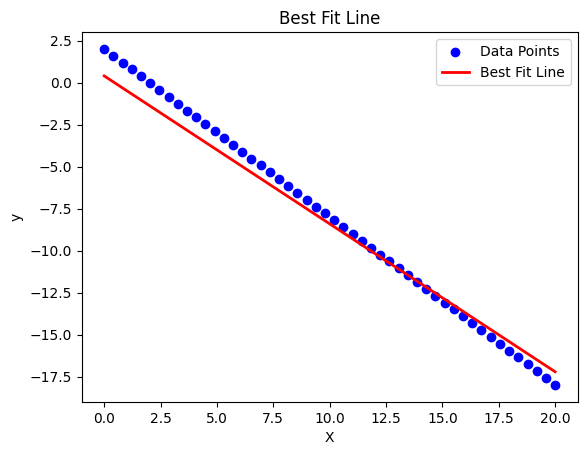

Final theta values: [[0.74222423]
 [1.51061621]]
R² score: 0.9808387697940645


In [52]:
r2 = r2_score(y.reshape(-1, 1), y_pred)



plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)

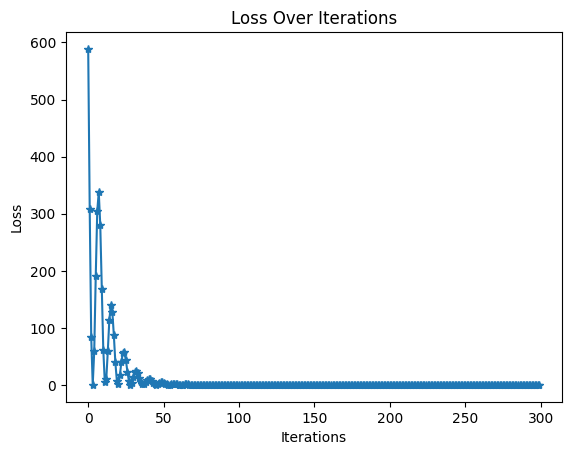

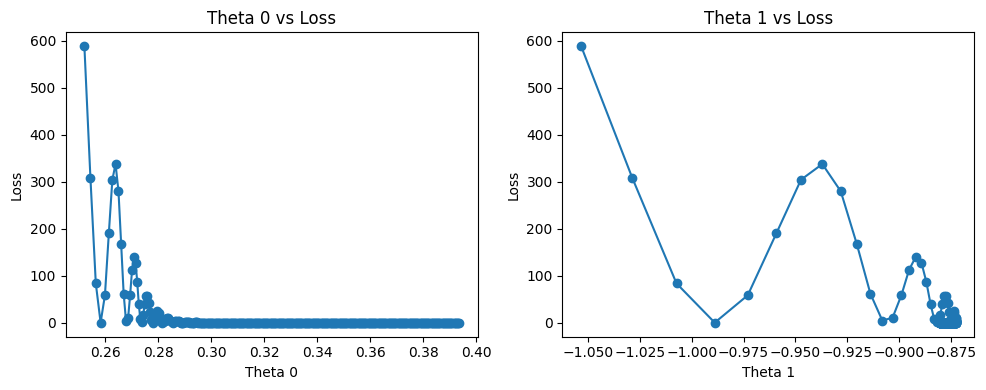

In [53]:
plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [54]:
alpha = 0.0005  
gamma = 0.89     
max_iterations = 300
final_weights, loss_history, weights_history = momentum_based_gradient_descent(
    X_b, y.reshape(-1, 1), theta, learning_rate=alpha, n_iterations=max_iterations, momentum=gamma
)

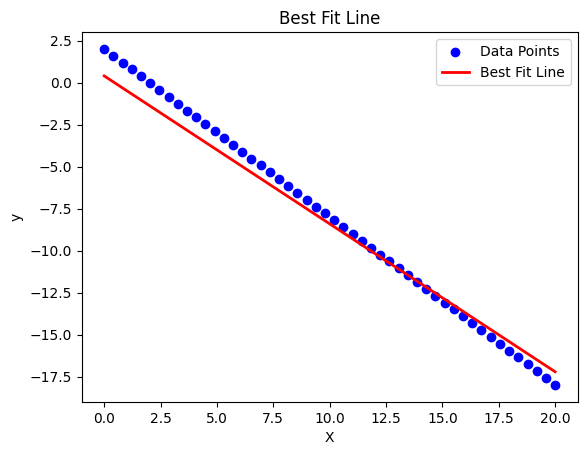

Final theta values: [[0.74222423]
 [1.51061621]]
R² score: 0.9808387697940645


In [55]:
r2 = r2_score(y.reshape(-1, 1), y_pred)



plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)


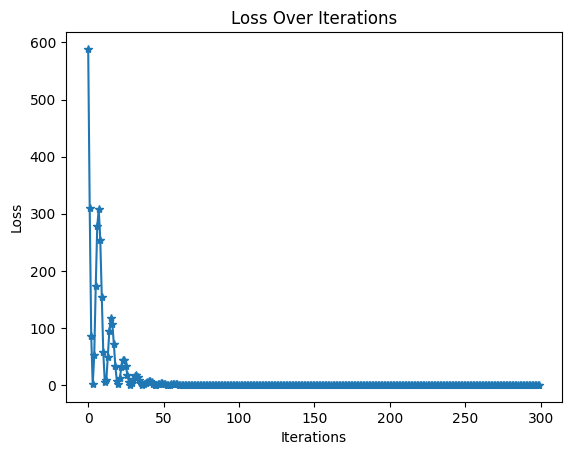

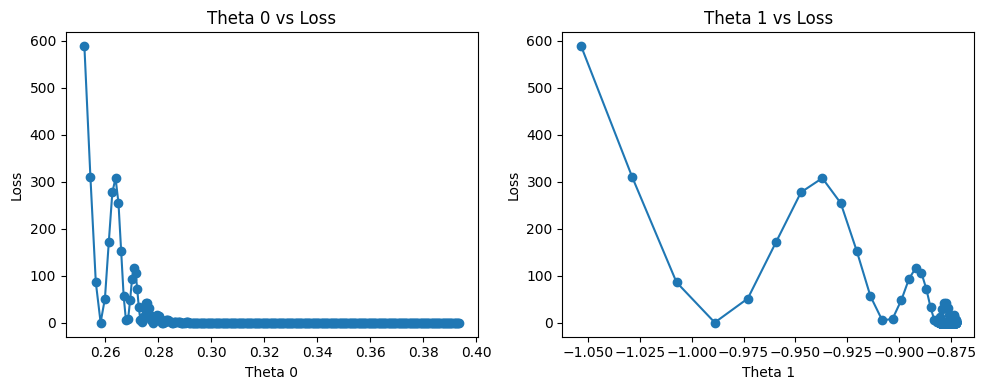

In [56]:
plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

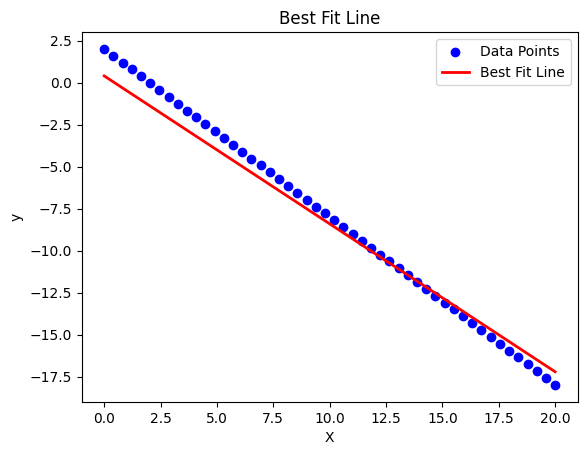

Final theta values: [[0.74222423]
 [1.51061621]]
R² score: 0.9808387697940645


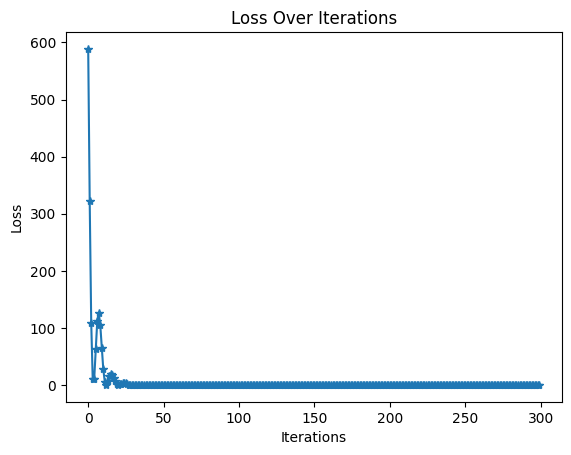

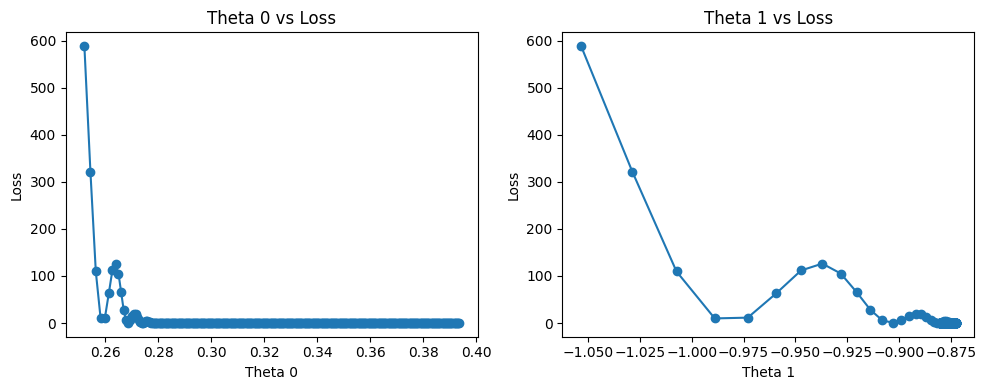

In [57]:
alpha = 0.0005  
gamma = 0.8     
max_iterations = 300
final_weights, loss_history, weights_history = momentum_based_gradient_descent(
    X_b, y.reshape(-1, 1), theta, learning_rate=alpha, n_iterations=max_iterations, momentum=gamma
)
r2 = r2_score(y.reshape(-1, 1), y_pred)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)
plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

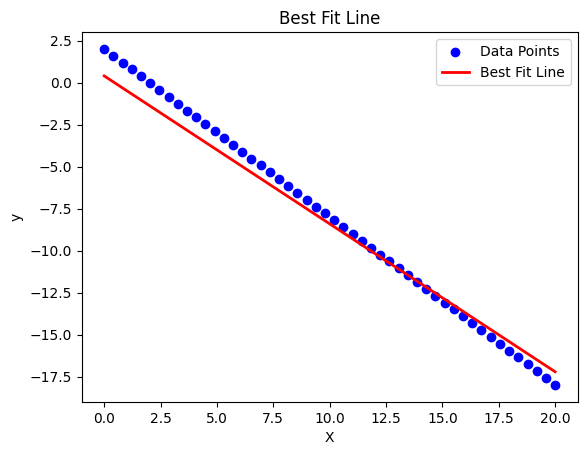

Final theta values: [[0.74222423]
 [1.51061621]]
R² score: 0.9808387697940645


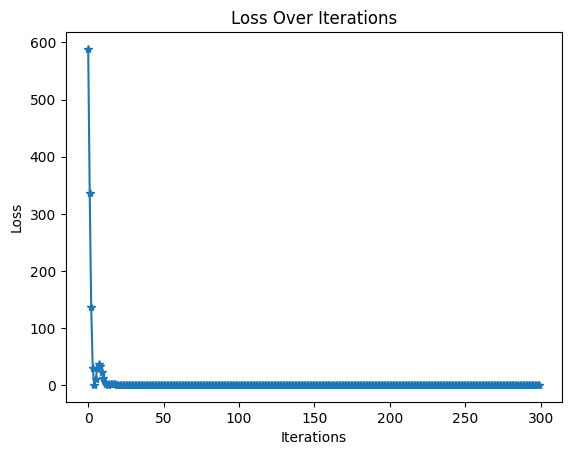

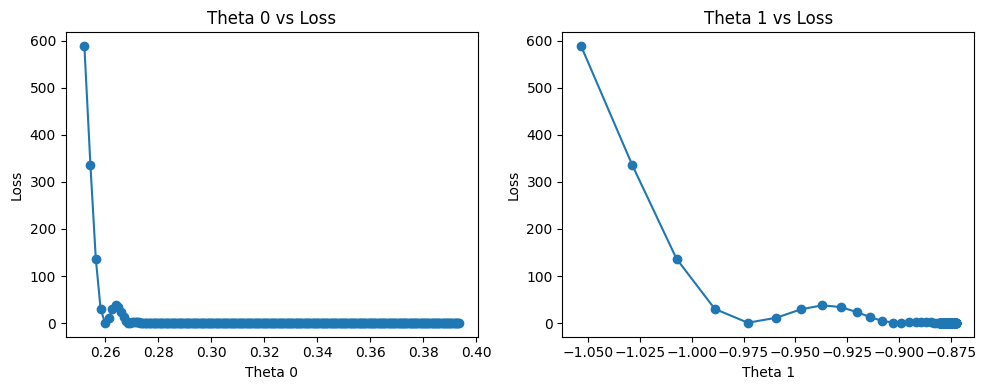

In [58]:
alpha = 0.0005  
gamma = 0.7   
max_iterations = 300
final_weights, loss_history, weights_history = momentum_based_gradient_descent(
    X_b, y.reshape(-1, 1), theta, learning_rate=alpha, n_iterations=max_iterations, momentum=gamma
)
r2 = r2_score(y.reshape(-1, 1), y_pred)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)
plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

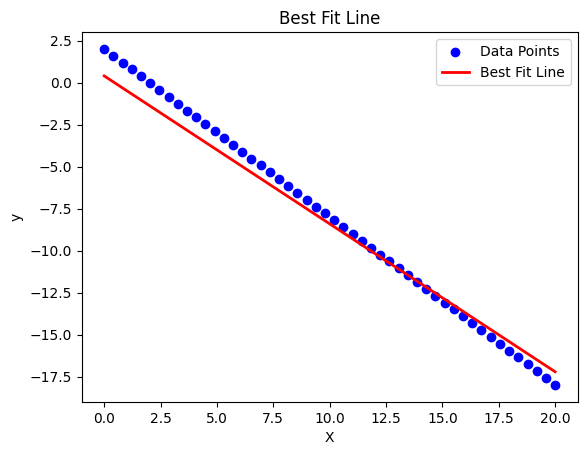

Final theta values: [[0.74222423]
 [1.51061621]]
R² score: 0.9808387697940645


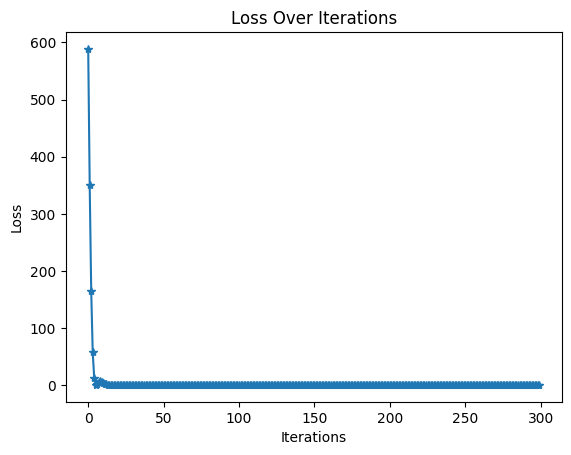

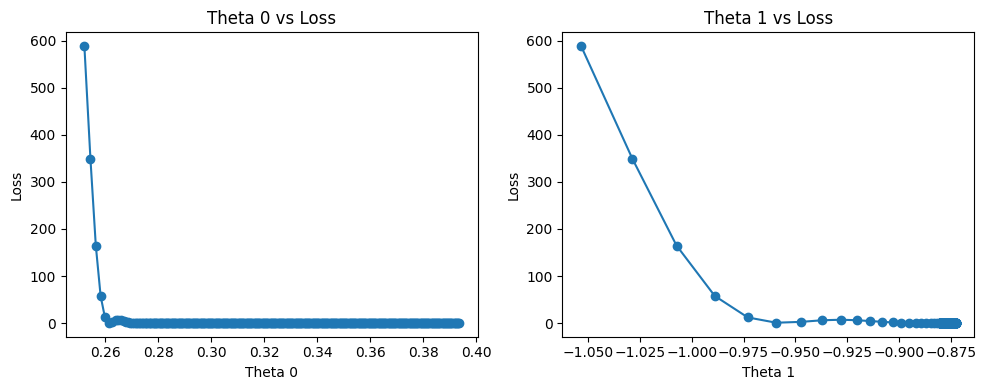

In [59]:
alpha = 0.0005  
gamma = 0.6    
max_iterations = 300
final_weights, loss_history, weights_history = momentum_based_gradient_descent(
    X_b, y.reshape(-1, 1), theta, learning_rate=alpha, n_iterations=max_iterations, momentum=gamma
)
r2 = r2_score(y.reshape(-1, 1), y_pred)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)
plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

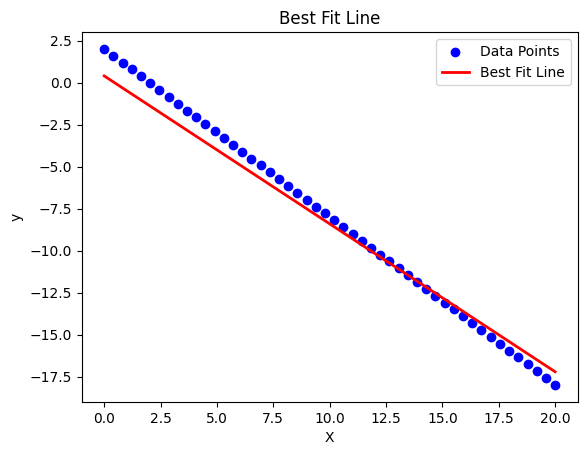

Final theta values: [[0.74222423]
 [1.51061621]]
R² score: 0.9808387697940645


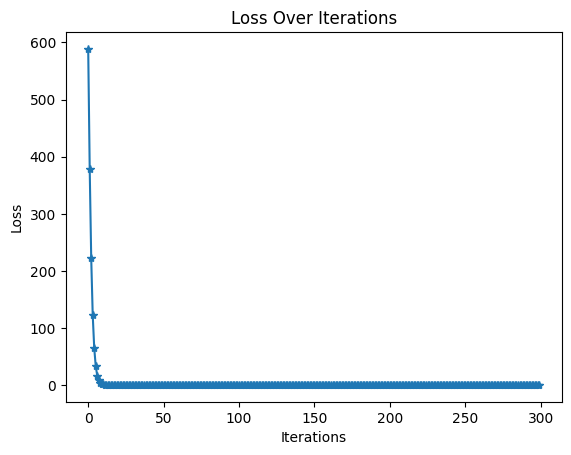

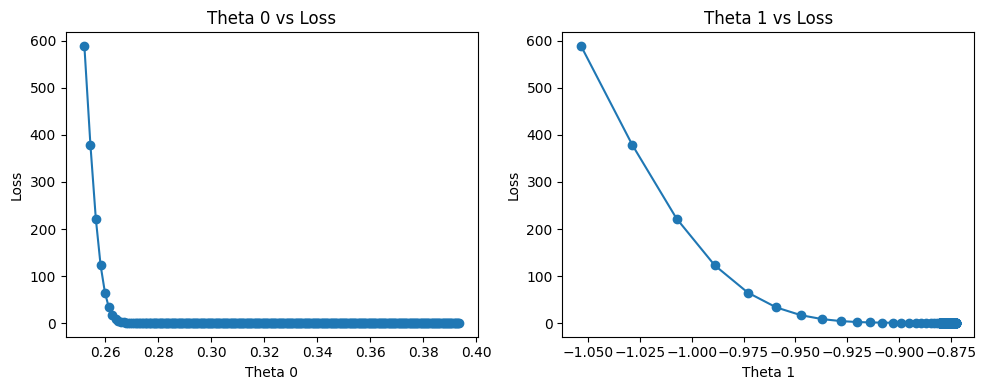

In [60]:
alpha = 0.0005  
gamma = 0.4    
max_iterations = 300
final_weights, loss_history, weights_history = momentum_based_gradient_descent(
    X_b, y.reshape(-1, 1), theta, learning_rate=alpha, n_iterations=max_iterations, momentum=gamma
)
r2 = r2_score(y.reshape(-1, 1), y_pred)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)
plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

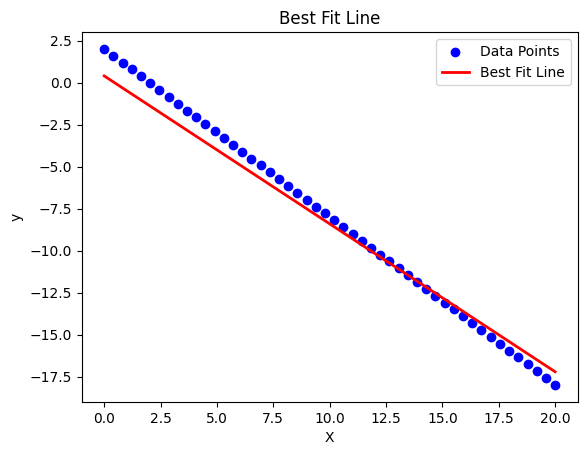

Final theta values: [[0.74222423]
 [1.51061621]]
R² score: 0.9808387697940645


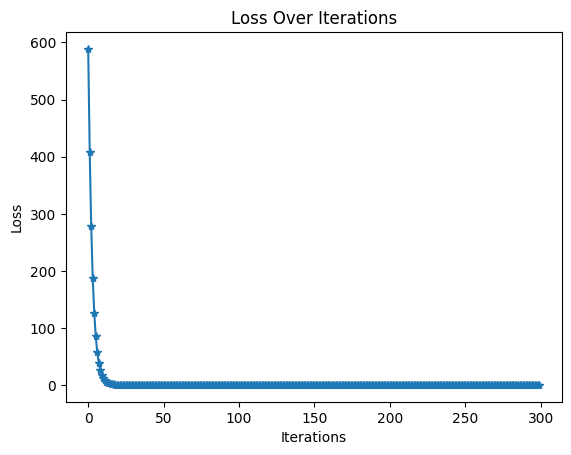

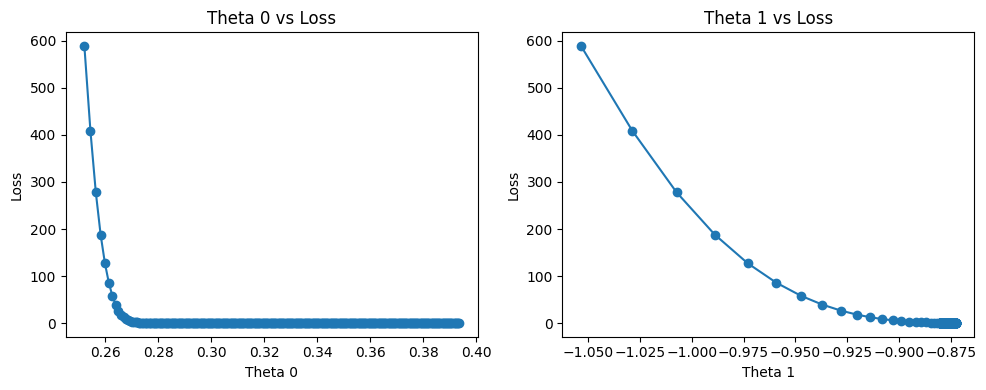

In [61]:
alpha = 0.0005  
gamma = 0.2    
max_iterations = 300
final_weights, loss_history, weights_history = momentum_based_gradient_descent(
    X_b, y.reshape(-1, 1), theta, learning_rate=alpha, n_iterations=max_iterations, momentum=gamma
)
r2 = r2_score(y.reshape(-1, 1), y_pred)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)
plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

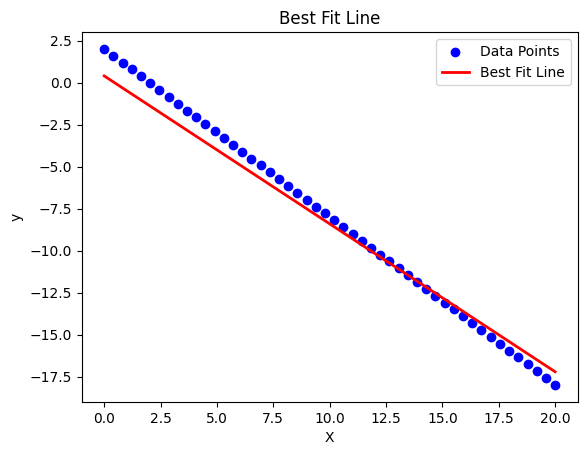

Final theta values: [[0.74222423]
 [1.51061621]]
R² score: 0.9808387697940645


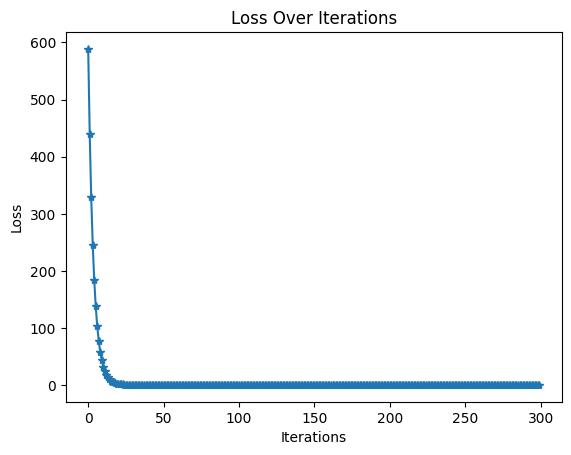

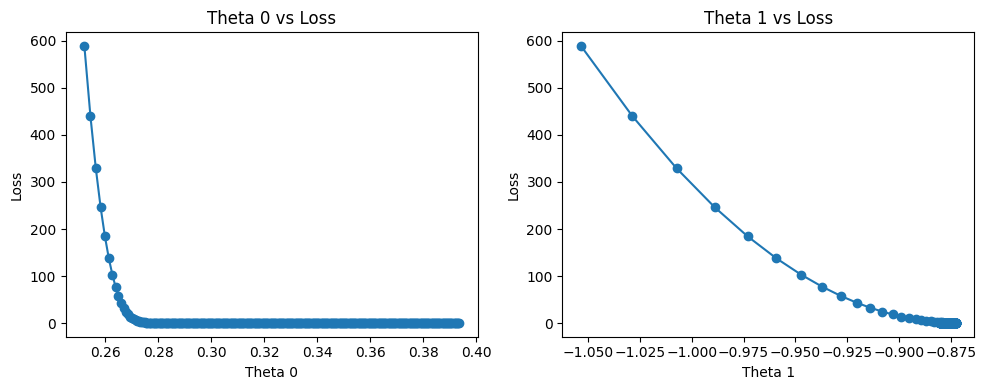

In [62]:
alpha = 0.0005  
gamma = 0     
max_iterations = 300
final_weights, loss_history, weights_history = momentum_based_gradient_descent(
    X_b, y.reshape(-1, 1), theta, learning_rate=alpha, n_iterations=max_iterations, momentum=gamma
)
r2 = r2_score(y.reshape(-1, 1), y_pred)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)
plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [65]:
h_temp = X_b.dot(theta)
h_temp
        

array([[ 0.74222423],
       [ 1.35880227],
       [ 1.97538032],
       [ 2.59195836],
       [ 3.2085364 ],
       [ 3.82511445],
       [ 4.44169249],
       [ 5.05827053],
       [ 5.67484858],
       [ 6.29142662],
       [ 6.90800466],
       [ 7.52458271],
       [ 8.14116075],
       [ 8.75773879],
       [ 9.37431684],
       [ 9.99089488],
       [10.60747292],
       [11.22405097],
       [11.84062901],
       [12.45720705],
       [13.0737851 ],
       [13.69036314],
       [14.30694118],
       [14.92351923],
       [15.54009727],
       [16.15667532],
       [16.77325336],
       [17.3898314 ],
       [18.00640945],
       [18.62298749],
       [19.23956553],
       [19.85614358],
       [20.47272162],
       [21.08929966],
       [21.70587771],
       [22.32245575],
       [22.93903379],
       [23.55561184],
       [24.17218988],
       [24.78876792],
       [25.40534597],
       [26.02192401],
       [26.63850205],
       [27.2550801 ],
       [27.87165814],
       [28

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [69]:

def momentum_based_gradient_descent(X, y,  learning_rate, n_iterations, momentum, stop_criteria=1e-5):
    theta = np.random.randn(2, 1)
    m = len(y)
    loss_history = []
    theta_history = []
    velocity = np.zeros_like(theta)  
    for iteration in range(n_iterations):
        h_temp = X.dot(theta) 
        gradients = (2 / m) * X.T.dot(h_temp - y)
        velocity = momentum * velocity + learning_rate * gradients
        theta = theta - velocity
        loss = np.mean((h_temp - y) ** 2)
        loss_history.append(loss)
        theta_history.append(theta.copy())
        if iteration > 0 and abs(loss_history[-2] - loss_history[-1]) < stop_criteria:
            break

    return theta, loss_history, theta_history




In [70]:
alpha = 0.0005
gamma = 0.9   
max_iterations = 300
final_weights, loss_history, weights_history = momentum_based_gradient_descent(
    X_b, y.reshape(-1, 1),  learning_rate=alpha, n_iterations=max_iterations, momentum=gamma
)
print("Final weights:", final_weights)
print("Last 5 loss values:", loss_history[-5:])  


Final weights: [[ 1.35781848]
 [-0.95223173]]
Last 5 loss values: [0.10905230797751202, 0.10848081109635789, 0.10791230919344233, 0.10734678657108104, 0.10678422761270141]


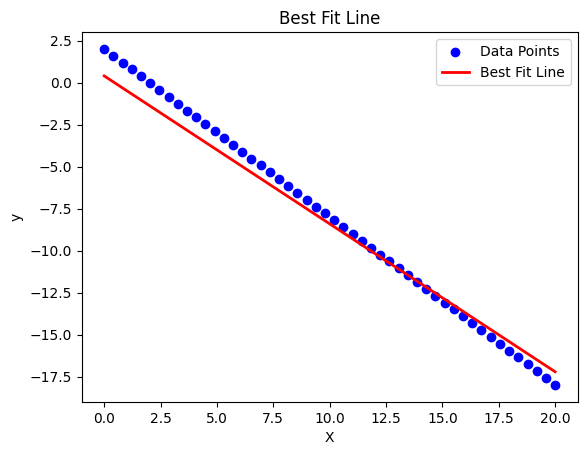

Final theta values: [[-2.07985455]
 [ 1.40541744]]
R² score: 0.9808387697940645


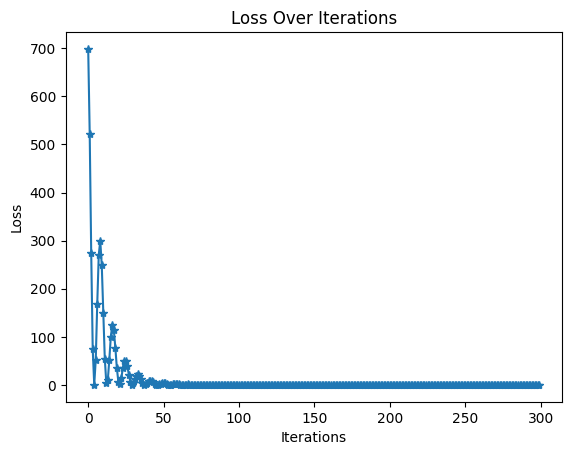

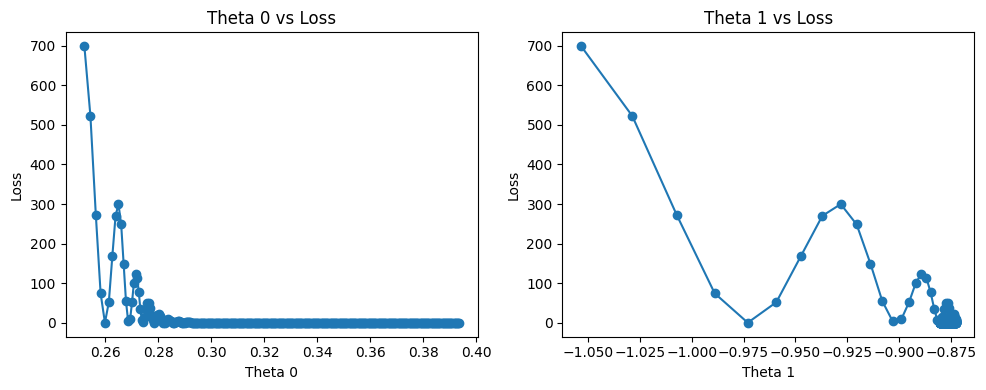

In [71]:
r2 = r2_score(y.reshape(-1, 1), y_pred)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)
plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

Final weights: [[ 2.13091862]
 [-0.97477579]]
Last 5 loss values: [4.693215964175614, 4.281784146573615, 2.870108609363524, 1.205011042789818, 0.13548868157570865]


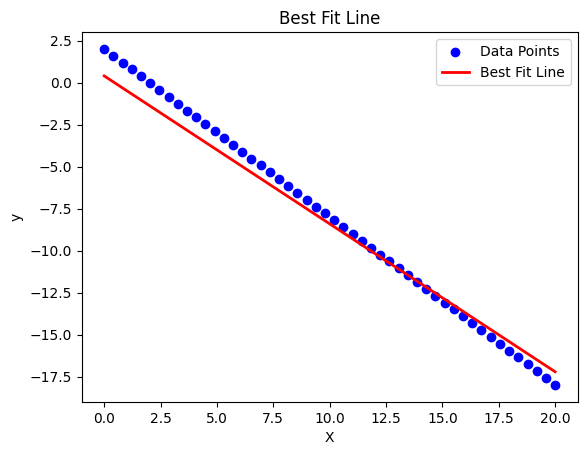

Final theta values: [[-2.07985455]
 [ 1.40541744]]
R² score: 0.9808387697940645


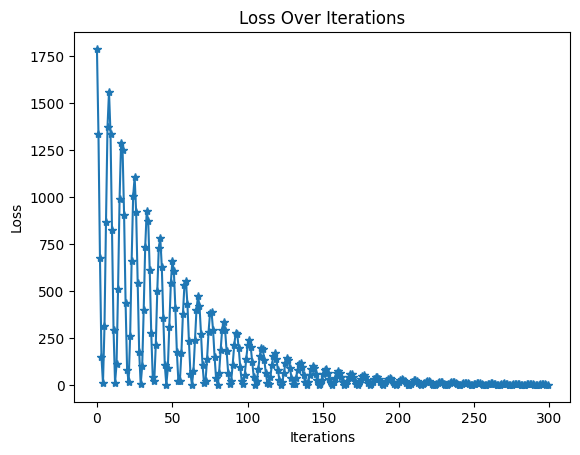

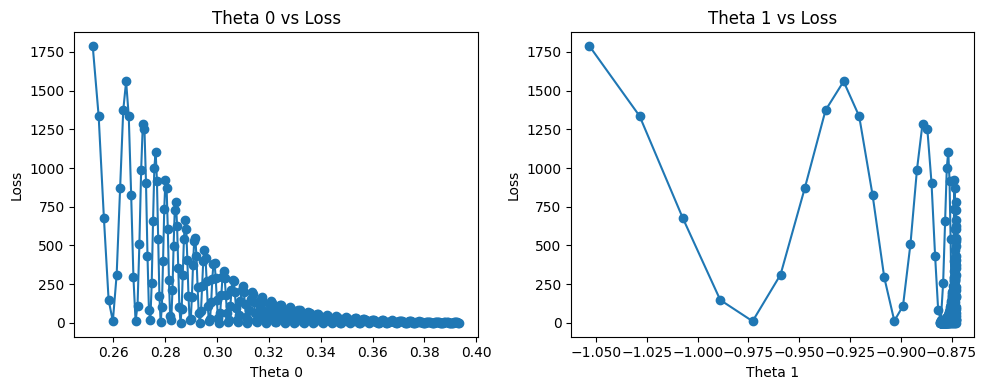

In [72]:
alpha = 0.0005
gamma = 0.98   
max_iterations = 300
final_weights, loss_history, weights_history = momentum_based_gradient_descent(
    X_b, y.reshape(-1, 1),  learning_rate=alpha, n_iterations=max_iterations, momentum=gamma
)
print("Final weights:", final_weights)
print("Last 5 loss values:", loss_history[-5:])  
r2 = r2_score(y.reshape(-1, 1), y_pred)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)
plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

Final weights: [[ 0.04801225]
 [-0.85480356]]
Last 5 loss values: [1.002986097238547, 0.9986393429111731, 0.9943114266048195, 0.9900022666790244, 0.985711781847137]


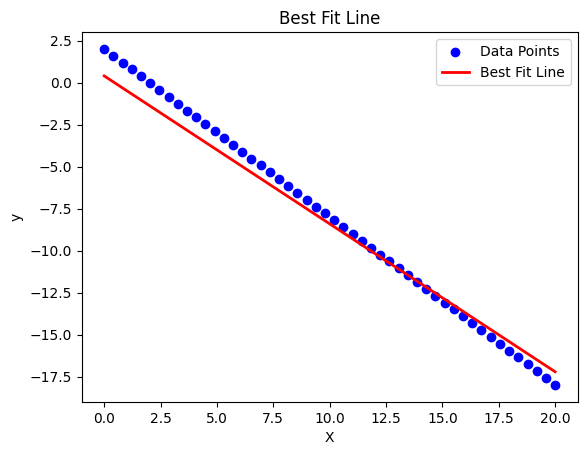

Final theta values: [[-2.07985455]
 [ 1.40541744]]
R² score: 0.9808387697940645


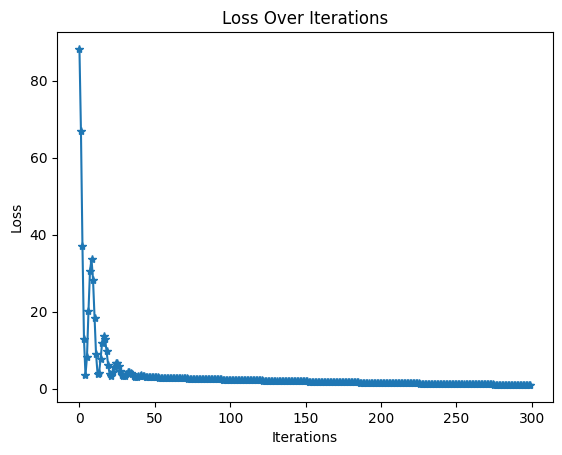

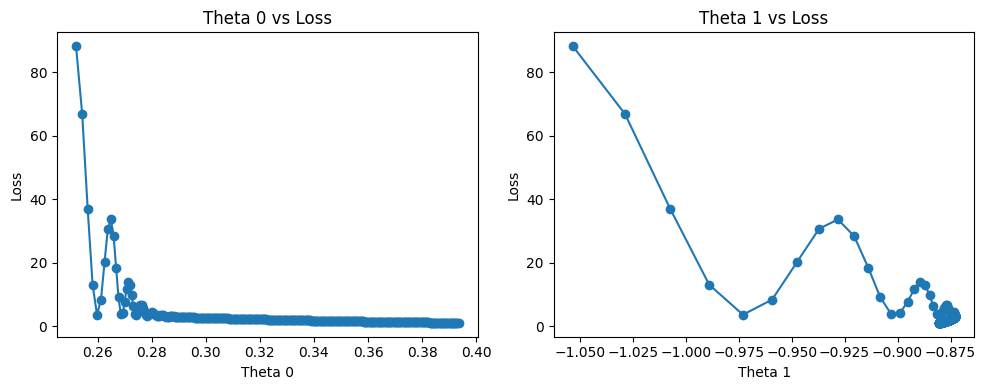

In [73]:
alpha = 0.0005
gamma = 0.88   
max_iterations = 300
final_weights, loss_history, weights_history = momentum_based_gradient_descent(
    X_b, y.reshape(-1, 1),  learning_rate=alpha, n_iterations=max_iterations, momentum=gamma
)
print("Final weights:", final_weights)
print("Last 5 loss values:", loss_history[-5:])  
r2 = r2_score(y.reshape(-1, 1), y_pred)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)
plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

Final weights: [[ 1.073527  ]
 [-0.93108534]]
Last 5 loss values: [0.2236948040348681, 0.22317201237070536, 0.22265044251017488, 0.22213009159782945, 0.22161095678489484]


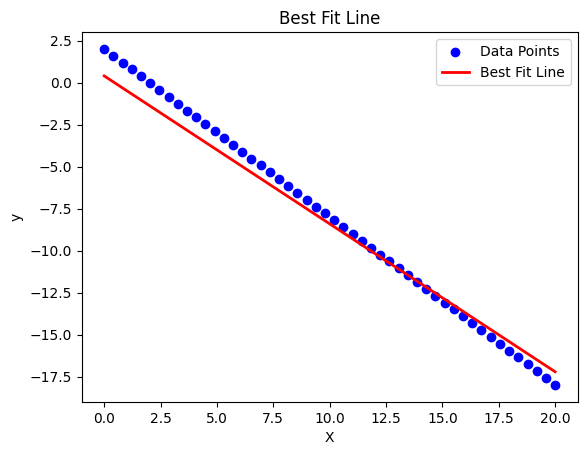

Final theta values: [[-2.07985455]
 [ 1.40541744]]
R² score: 0.9808387697940645


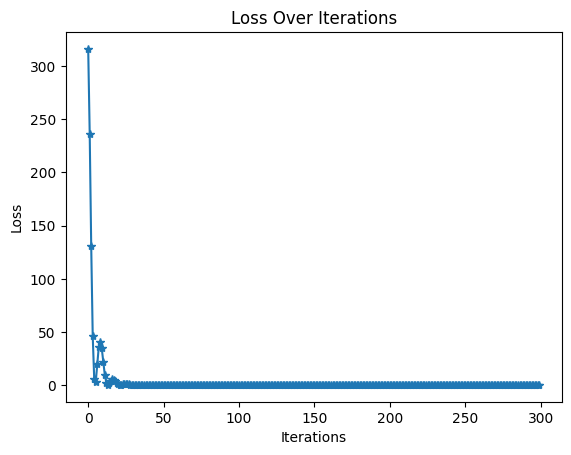

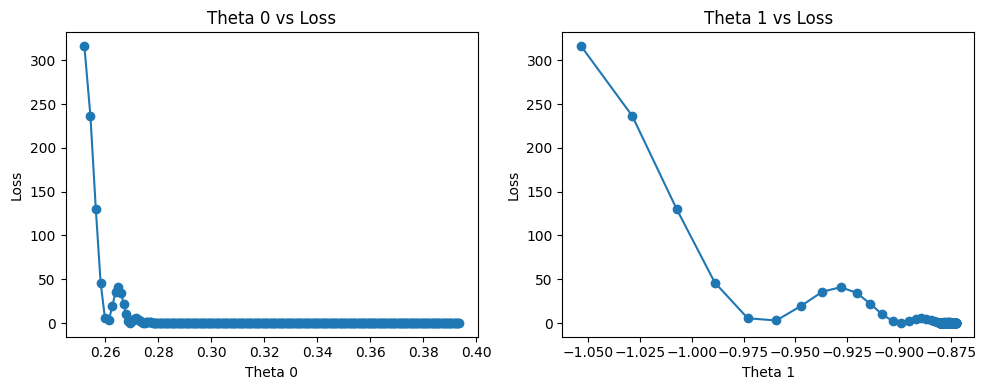

In [74]:
alpha = 0.0005
gamma = 0.78   
max_iterations = 300
final_weights, loss_history, weights_history = momentum_based_gradient_descent(
    X_b, y.reshape(-1, 1),  learning_rate=alpha, n_iterations=max_iterations, momentum=gamma
)
print("Final weights:", final_weights)
print("Last 5 loss values:", loss_history[-5:])  
r2 = r2_score(y.reshape(-1, 1), y_pred)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)
plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

Final weights: [[ 1.29915436]
 [-0.94786835]]
Last 5 loss values: [0.12956231882768937, 0.1289477673899676, 0.12833613094695118, 0.12772739567196492, 0.12712154780391371]


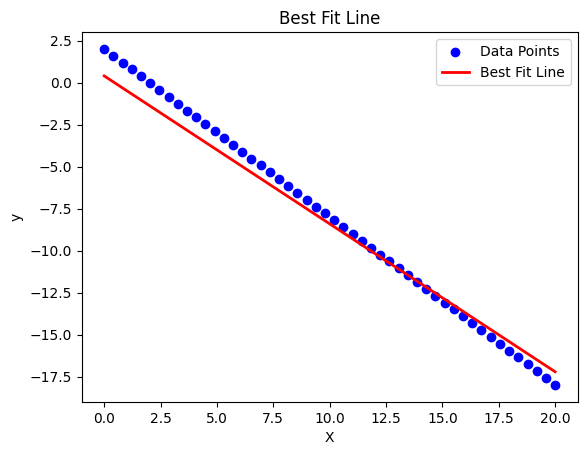

Final theta values: [[-2.07985455]
 [ 1.40541744]]
R² score: 0.9808387697940645


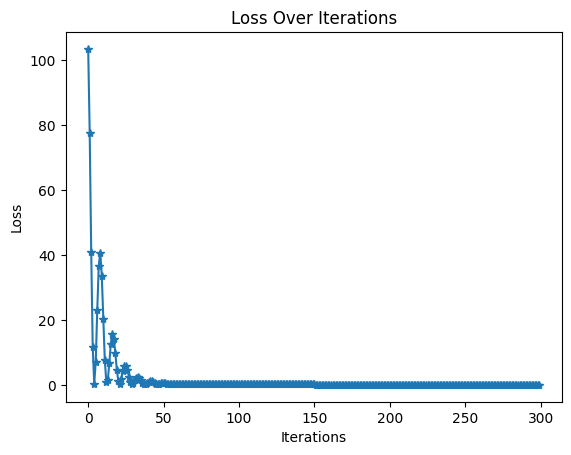

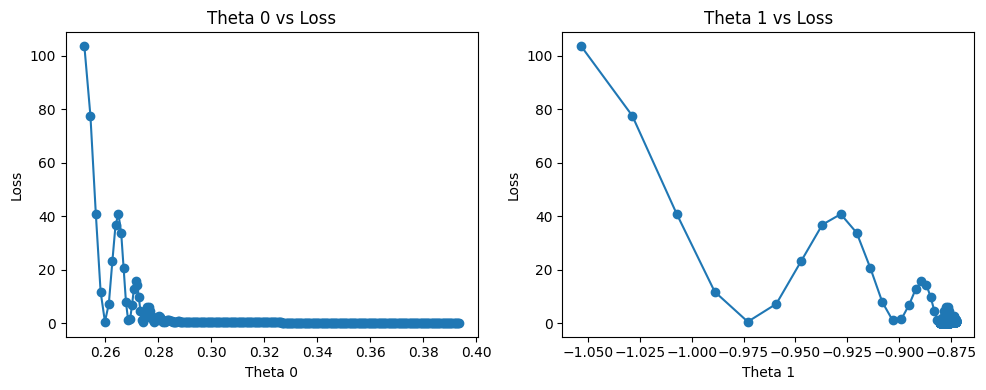

In [75]:
alpha = 0.0005
gamma = 0.89   
max_iterations = 300
final_weights, loss_history, weights_history = momentum_based_gradient_descent(
    X_b, y.reshape(-1, 1),  learning_rate=alpha, n_iterations=max_iterations, momentum=gamma
)
print("Final weights:", final_weights)
print("Last 5 loss values:", loss_history[-5:])  
r2 = r2_score(y.reshape(-1, 1), y_pred)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)
plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

Final weights: [[ 0.7188166]
 [-0.9047006]]
Last 5 loss values: [0.42755301127393586, 0.42659759461607266, 0.42564431294724214, 0.42469316149656455, 0.42374413550382156]


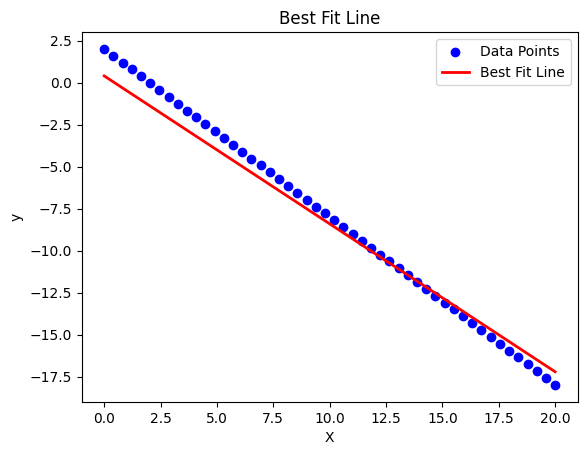

Final theta values: [[-2.07985455]
 [ 1.40541744]]
R² score: 0.9808387697940645


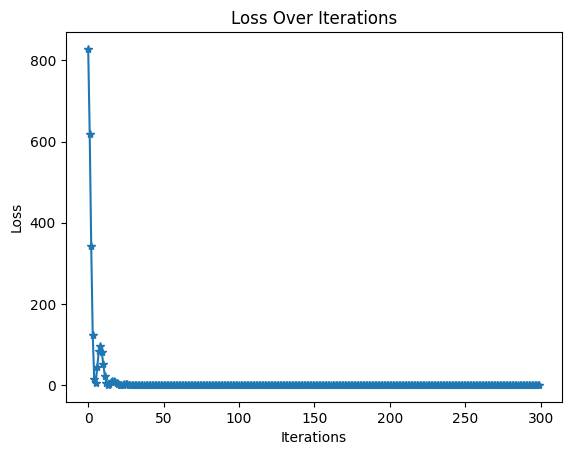

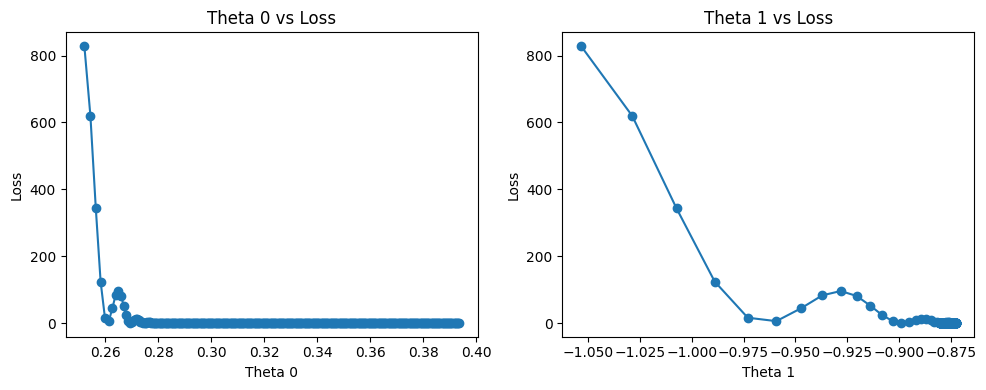

In [76]:
alpha = 0.0005
gamma = 0.77  
max_iterations = 300
final_weights, loss_history, weights_history = momentum_based_gradient_descent(
    X_b, y.reshape(-1, 1),  learning_rate=alpha, n_iterations=max_iterations, momentum=gamma
)
print("Final weights:", final_weights)
print("Last 5 loss values:", loss_history[-5:])  
r2 = r2_score(y.reshape(-1, 1), y_pred)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)
plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)

Final weights: [[-0.14243659]
 [-0.84063724]]
Last 5 loss values: [1.1950309608773282, 1.1924726373184051, 1.1899197906212935, 1.1873724090611197, 1.184830480938114]


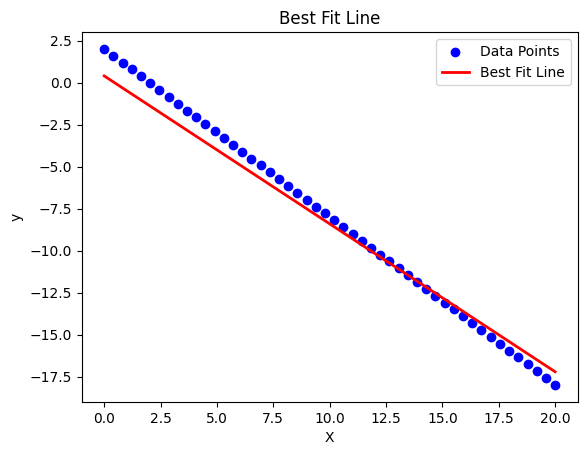

Final theta values: [[-2.07985455]
 [ 1.40541744]]
R² score: 0.9808387697940645


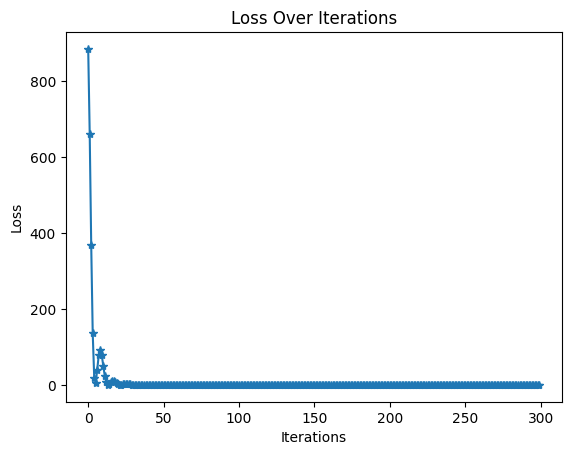

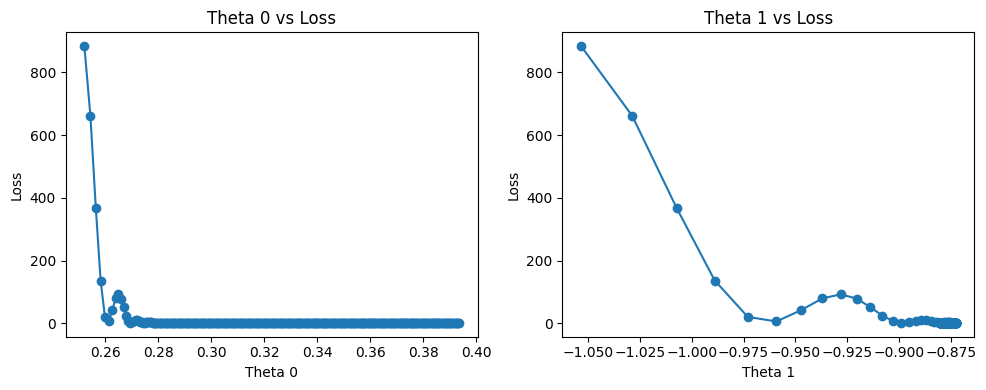

In [77]:
alpha = 0.0005
gamma = 0.76   
max_iterations = 300
final_weights, loss_history, weights_history = momentum_based_gradient_descent(
    X_b, y.reshape(-1, 1),  learning_rate=alpha, n_iterations=max_iterations, momentum=gamma
)
print("Final weights:", final_weights)
print("Last 5 loss values:", loss_history[-5:])  
r2 = r2_score(y.reshape(-1, 1), y_pred)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

print("Final theta values:", theta)
print("R² score:", r2)
plot_loss(loss_history)
plot_thetas_loss(thetas_history, loss_history)